In [1]:
from austr.buildin.presentations import buechi_arithmetic
from visual_automata.fa.dfa import VisualDFA
from austr.utils.automata_tools import iterate_language

In [2]:
ba = buechi_arithmetic()

A(x,x,x): 3 states


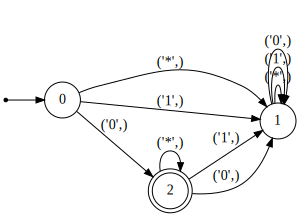

In [3]:
# Define zero
ba.update(O='A(x,x,x)')
VisualDFA(ba.automata['O']).show_diagram()

O(x): 3 states
-O(x): 4 states
O(y): 3 states
O(z): 3 states
(O(y) | O(z)): 5 states
A(y,z,x): 16 states
-A(y,z,x): 46 states
(O(y) | O(z) | -A(y,z,x)): 54 states
-(O(y) | O(z) | -A(y,z,x)): 14 states
all z.(O(y) | O(z) | -A(y,z,x)): 13 states
-all z.(O(y) | O(z) | -A(y,z,x)): 8 states
all y z.(O(y) | O(z) | -A(y,z,x)): 3 states
(-O(x) & all y z.(O(y) | O(z) | -A(y,z,x))): 3 states


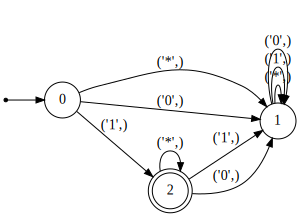

In [4]:
# Define one
ba.update(I='not O(x) and forall y z.(O(y) or O(z) or not A(y, z, x))')
VisualDFA(ba.automata['I']).show_diagram()

I(x): 3 states
A(u,x,v): 16 states
(I(x) & A(u,x,v)): 6 states
exists x.(I(x) & A(u,x,v)): 6 states


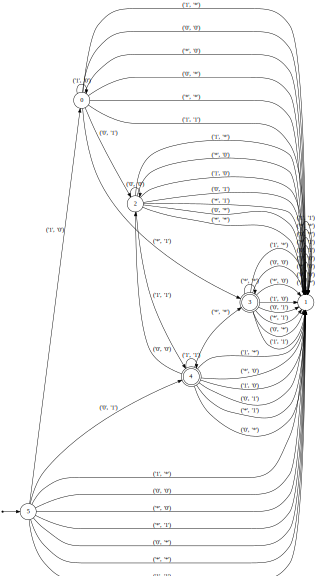

In [5]:
# Define successor
ba.update(S='exists x.(I(x) and A(u, x, v))')
VisualDFA(ba.automata['S']).show_diagram()

B(x,x): 3 states


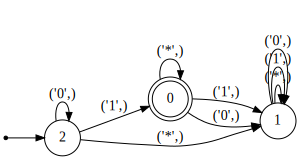

In [6]:
# Define powers of two
ba.update(P='B(x,x)')
VisualDFA(ba.automata['P']).show_diagram()

O(z): 3 states
-O(z): 4 states
A(x,z,y): 16 states
(-O(z) & A(x,z,y)): 16 states
exists z.(-O(z) & A(x,z,y)): 9 states


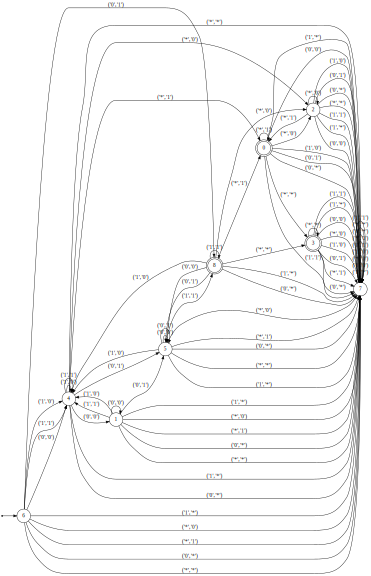

In [7]:
# Define linear order
ba.update(Smaller='exist z.(not O(z) and A(x, z, y))')
VisualDFA(ba.automata['Smaller']).show_diagram()

P(y): 3 states
Smaller(x0,y): 9 states
(P(y) & Smaller(x0,y)): 6 states
A(x0,x1,x): 16 states
(P(y) & Smaller(x0,y) & A(x0,x1,x)): 20 states
B(x1,y): 6 states
(P(y) & Smaller(x0,y) & A(x0,x1,x) & B(x1,y)): 8 states
Smaller(y,y1): 9 states
B(x1,y1): 6 states
(Smaller(y,y1) & B(x1,y1)): 8 states
exists y1.(Smaller(y,y1) & B(x1,y1)): 8 states
-exists y1.(Smaller(y,y1) & B(x1,y1)): 14 states
(P(y) & Smaller(x0,y) & A(x0,x1,x) & B(x1,y) & -exists y1.(Smaller(y,y1) & B(x1,y1))): 8 states
exists x1.(P(y) & Smaller(x0,y) & A(x0,x1,x) & B(x1,y) & -exists y1.(Smaller(y,y1) & B(x1,y1))): 8 states
exists x0 x1.(P(y) & Smaller(x0,y) & A(x0,x1,x) & B(x1,y) & -exists y1.(Smaller(y,y1) & B(x1,y1))): 6 states


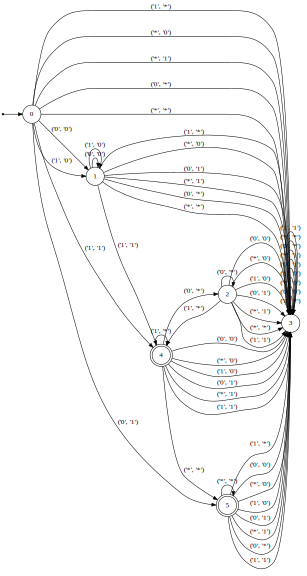

In [8]:
# Define bit predicate E(x, y) <=> y==2^n bin(x)[n] == 1
ba.update(
    E='exists x0 x1.(P(y) and Smaller(x0, y) and A(x0, x1, x) and B(x1, y) and not exists y1.(Smaller(y, y1) and B(x1, y1)))'
)
VisualDFA(ba.automata['E']).show_diagram()

O(x): 3 states
A(x,x,y): 6 states
A(x,u,v): 16 states
(A(x,x,y) & A(x,u,v)): 17 states
P(v): 3 states
(A(x,x,y) & A(x,u,v) & P(v)): 13 states
A(v,w,y): 16 states
(A(x,x,y) & A(x,u,v) & P(v) & A(v,w,y)): 17 states
exists w.(A(x,x,y) & A(x,u,v) & P(v) & A(v,w,y)): 11 states
exists v w.(A(x,x,y) & A(x,u,v) & P(v) & A(v,w,y)): 11 states
exists u v w.(A(x,x,y) & A(x,u,v) & P(v) & A(v,w,y)): 4 states
exists y u v w.(A(x,x,y) & A(x,u,v) & P(v) & A(v,w,y)): 4 states
(O(x) | exists y u v w.(A(x,x,y) & A(x,u,v) & P(v) & A(v,w,y))): 5 states
-(O(x) | exists y u v w.(A(x,x,y) & A(x,u,v) & P(v) & A(v,w,y))): 1 states
all x.(O(x) | exists y u v w.(A(x,x,y) & A(x,u,v) & P(v) & A(v,w,y))): 1 states


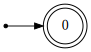

In [9]:
# Evaluate 'between a number x>0 and its double lies a power of 2'
a = ba.evaluate('forall x.(O(x) or exists y u v w.(A(x, x, y) and A(x, u, v) and P(v) and A(v, w, y)))')
VisualDFA(a).show_diagram()
